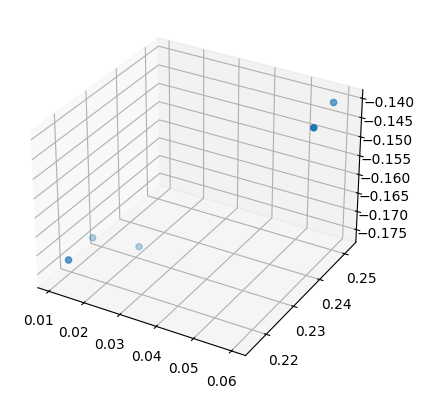

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


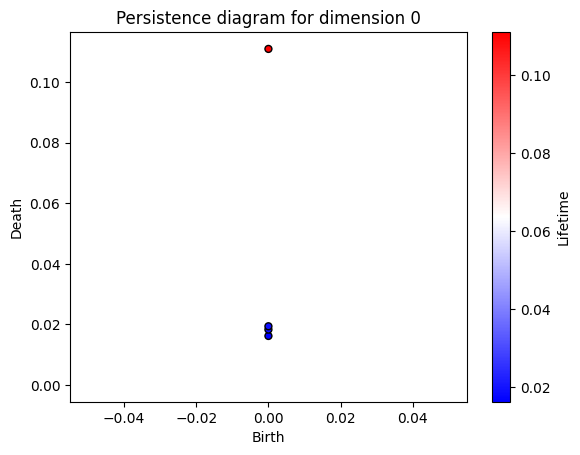

No data for dimension 1. Skipping plot.
No data for dimension 2. Skipping plot.
No data for dimension 3. Skipping plot.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser
from scipy.spatial.distance import pdist, squareform

p = 2
epsilon = .1

data = np.genfromtxt("betti.csv", delimiter=",")
data = data[:100]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

ax.scatter(x, y, z)
plt.show()

def distance(point1, point2, p):
    return np.power(np.sum(np.power(np.abs(point1 - point2), p)), 1/p)

def calculate_distance_matrix(dataset, p):
    distance_matrix = np.zeros((dataset.shape[0], dataset.shape[0]))
    for i in range(dataset.shape[0]):
        for j in range(dataset.shape[0]):
            distance_matrix[i, j] = distance(dataset[i], dataset[j], p)
    return distance_matrix

distance_matrix = calculate_distance_matrix(data, p) 

def plot_barcode(dgm, max_dimension):
    for dim in range(max_dimension + 1):
        if dgm[dim].size > 0:  # Check if the array is not empty
            plt.figure()
            plt.scatter(dgm[dim][:, 0], dgm[dim][:, 1], s=25, c=dgm[dim][:, 1]-dgm[dim][:, 0], cmap='bwr', edgecolor='k')
            plt.colorbar(label='Lifetime')
            plt.plot([0, np.max(dgm[dim])], [0, np.max(dgm[dim])], 'k--')
            plt.title(f'Persistence diagram for dimension {dim}')
            plt.xlabel('Birth')
            plt.ylabel('Death')
            plt.show()
        else:
            print(f"No data for dimension {dim}. Skipping plot.")

filtration = ripser(distance_matrix, maxdim=3)
plot_barcode(filtration['dgms'], max_dimension=3)